In [188]:
import numpy as np
import csv
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pickle

torch.manual_seed(1)

In [213]:
filepath = '/Users/js/Desktop/datasets/sp500/individual_stocks_5yr/TIF_data.csv'

values = []

with open(filepath, 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        values.append(row[4])

values = [float(j) for j in values]

values = torch.tensor(values)

x = values[:-1].unsqueeze(1)
y = values[1:].unsqueeze(1)

batch_size = 64
chunks = len(x) // 64

times = torch.arange(1, chunks * batch_size + 1)

x = x[:chunks * batch_size]
x = x.reshape(batch_size, -1, 1)

y = y[:chunks * batch_size]
y = y.reshape(batch_size, -1, 1)

In [78]:
class lstm(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, num_layers, batch_size, dropout):
        super(lstm, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.dropout = dropout

        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, batch_first=True, dropout=self.dropout)
        self.output = nn.Linear(self.hidden_dim, self.output_dim)
        
    def forward(self, x, hidden):
        x = x.reshape(self.batch_size, -1, self.input_dim)
        out, hidden = self.lstm(x)
        out.reshape(-1, self.hidden_dim)
        out = self.output(out)
        return(out, hidden)

In [136]:
model = lstm(input_dim=1, output_dim=1, hidden_dim=16, num_layers=1, batch_size=batch_size, dropout=0.0)
model

lstm(
  (lstm): LSTM(1, 16, batch_first=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)

In [193]:
hidden = None

In [ ]:
f = open('/Users/js/programs/hidden.pckl', 'rb')
hidden = pickle.load(f)
f.close()

model = torch.load(PATH)
model.eval()

In [149]:
loss_fn = nn.MSELoss()
optimizer = optim.Adadelta(model.parameters(), eps=1e-5, rho=0.95, lr=1e-2)

2.7195379734039307


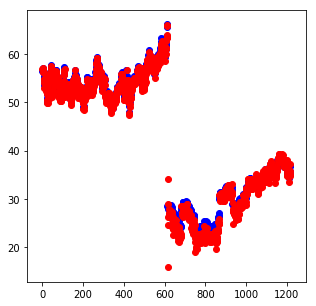

In [194]:
epochs = 2000
show_every = 500

model.train()
for e in range(epochs):
    model.zero_grad()
    prediction, hidden = model(x, hidden)
    loss = loss_fn(prediction, y)
    loss.backward()
    optimizer.step()
    if (e+1) % show_every == 0:
        print(loss.item())
        plt.figure(figsize=(5, 5))
        prediction = prediction.reshape(-1, 1)
        prediction = prediction.detach().numpy()
        plt.scatter(times, y.reshape(-1, 1), color='b')
        plt.scatter(times, prediction, color='r')
        plt.show()

2.9037587642669678


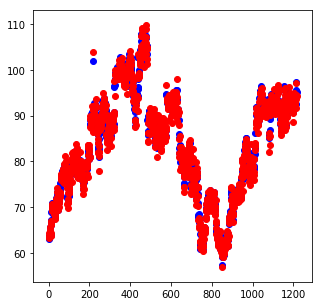

In [214]:
model.eval()
prediction, hidden = model(x, hidden)
loss = loss_fn(prediction, y)
print(loss.item())
plt.figure(figsize=(5, 5))
prediction = prediction.reshape(-1, 1)
prediction = prediction.detach().numpy()
plt.scatter(times, y.reshape(-1, 1), color='b')
plt.scatter(times, prediction, color='r')
plt.show()

1.2809439897537231
XRX_data.csv


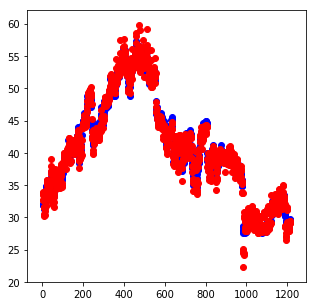

136.42210388183594
GS_data.csv


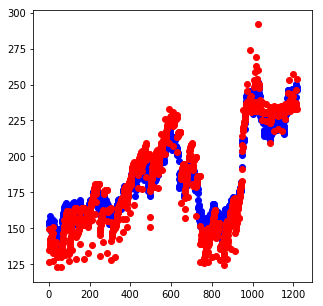

13.19162368774414
SPGI_data.csv


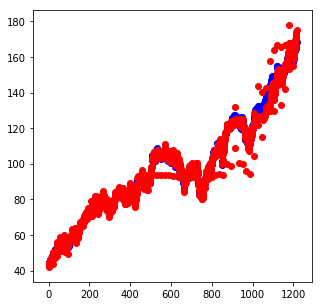

19.953813552856445
MTB_data.csv


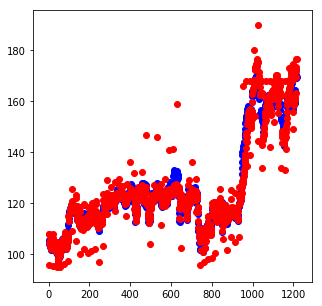

1.5276992321014404
V_data.csv


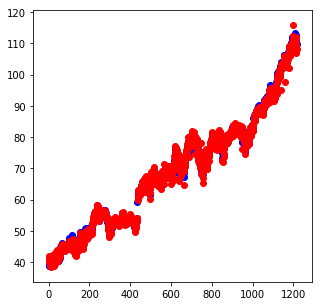

6.422815799713135
CTAS_data.csv


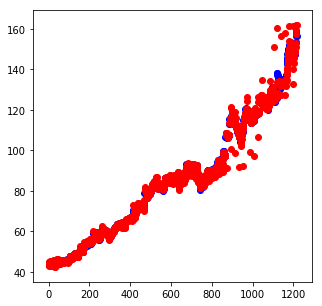

1.1883034706115723
ESRX_data.csv


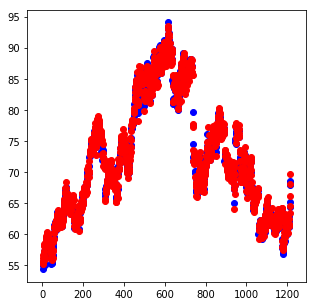

0.6242209076881409
APH_data.csv


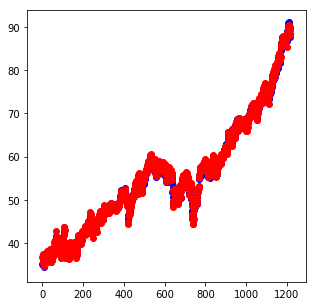

0.3653155267238617
BBT_data.csv


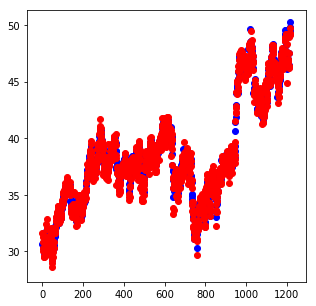

0.6964929103851318
RHI_data.csv


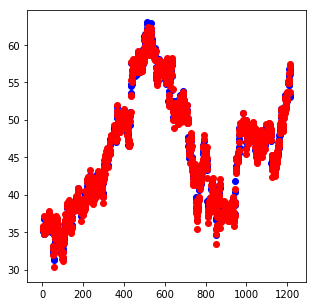

0.3527120053768158
GGP_data.csv


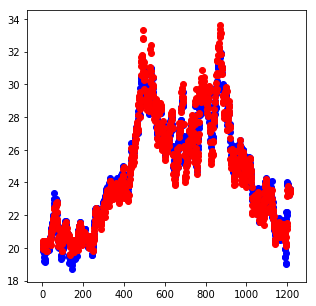

1.6809338331222534
HCA_data.csv


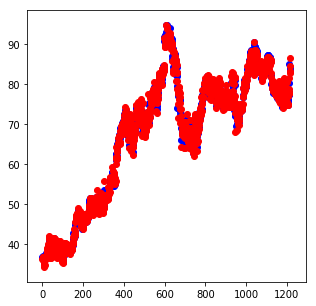

50.72465515136719
HD_data.csv


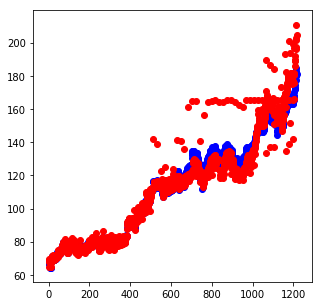

1.9932518005371094
PEP_data.csv


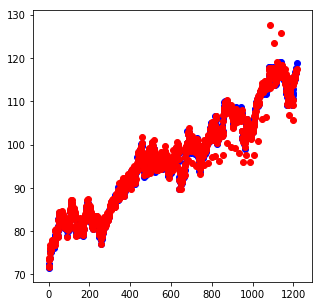

0.6218499541282654
INTC_data.csv


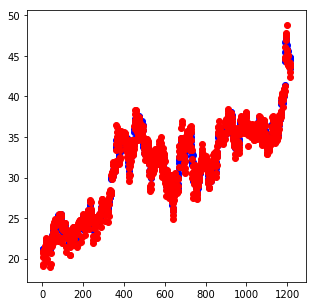

1.1477493047714233
MAC_data.csv


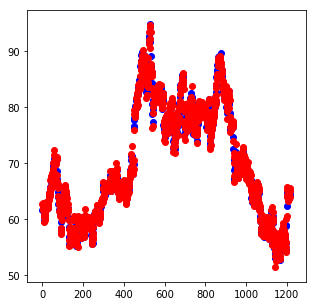

8.98218059539795
CLX_data.csv


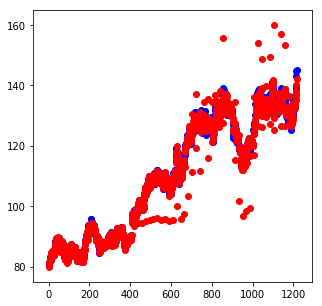

3.5553982257843018
UNP_data.csv


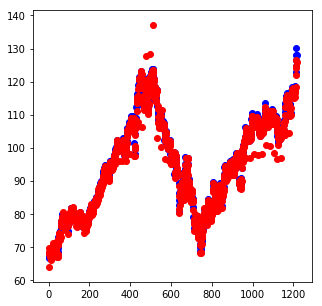

33.275665283203125
WAT_data.csv


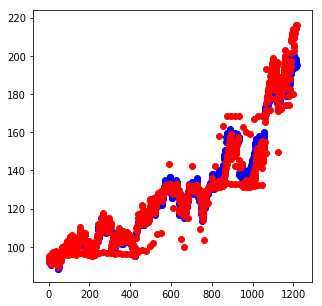

1.5766854286193848
EMN_data.csv


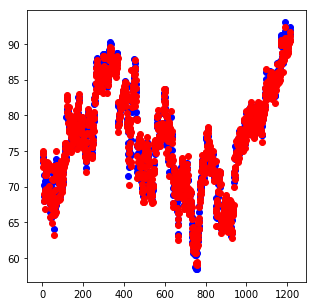

2.8128678798675537
ADSK_data.csv


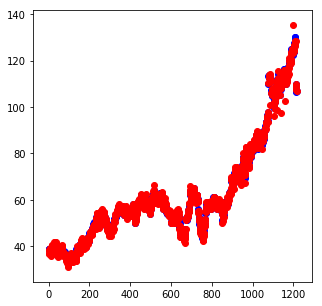

1.7936077117919922
ALK_data.csv


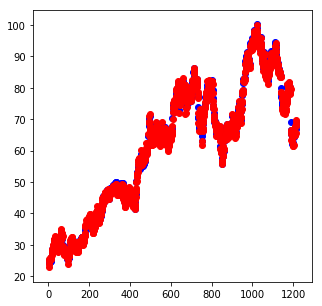

0.291778564453125
VZ_data.csv


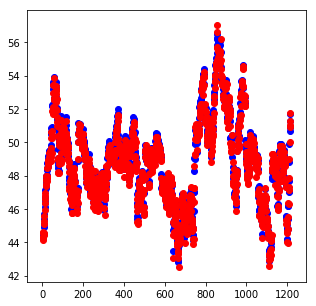

0.4900311827659607
AFL_data.csv


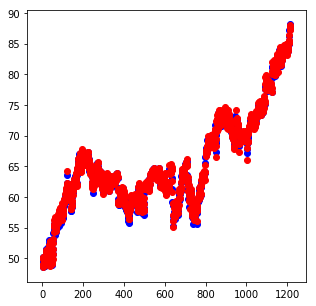

3.364175796508789
ADP_data.csv


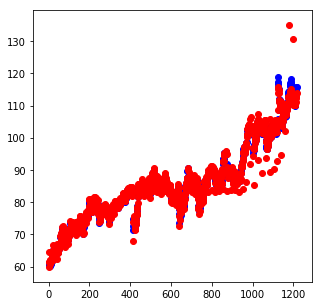

0.3971666097640991
CSRA_data.csv


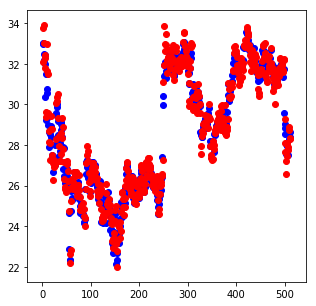

10.187824249267578
AON_data.csv


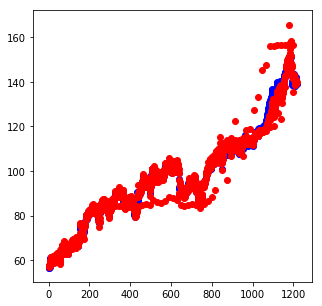

3.2427210807800293
APC_data.csv


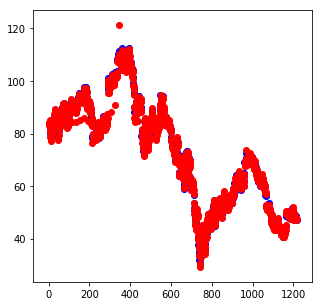

0.8537080883979797
WRK_data.csv


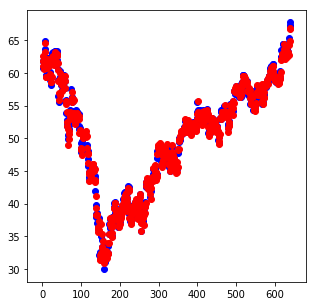

0.4085979759693146
XYL_data.csv


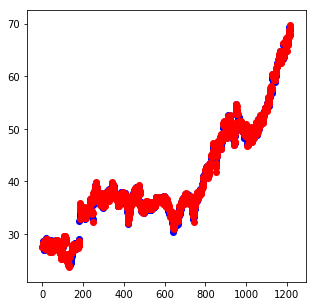

0.8083595633506775
OMC_data.csv


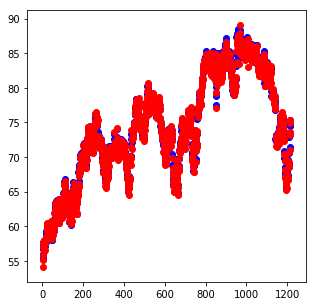

3.270789861679077
SLB_data.csv


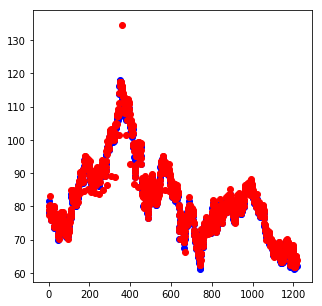

1.018416404724121
NOV_data.csv


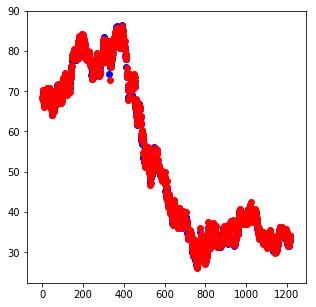

0.6988555192947388
CMA_data.csv


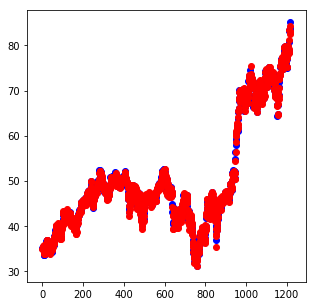

0.33346661925315857
INFO_data.csv


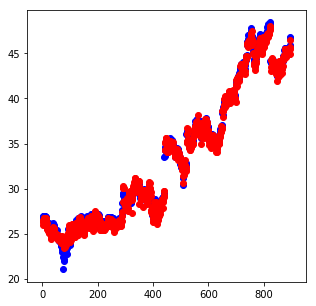

1.7383811473846436
CRM_data.csv


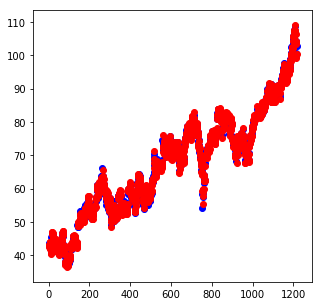

78.18708038330078
AMGN_data.csv


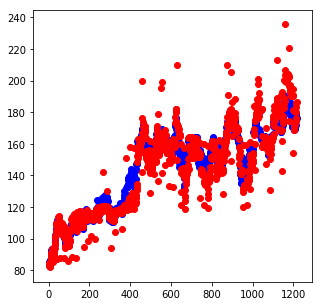

0.6848288178443909
ED_data.csv


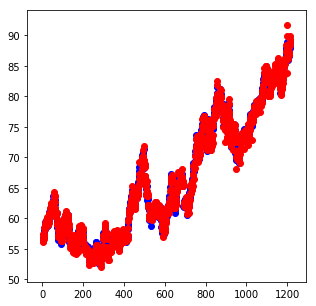

1.2739291191101074
AIZ_data.csv


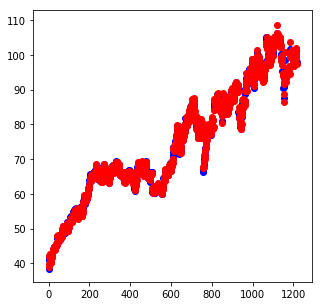

0.21222777664661407
RSG_data.csv


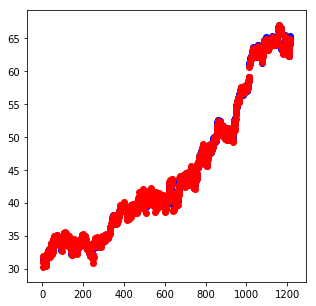

1.8866569995880127
NRG_data.csv


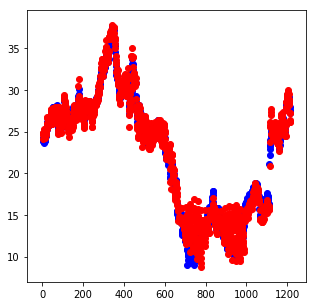

0.41610923409461975
FLIR_data.csv


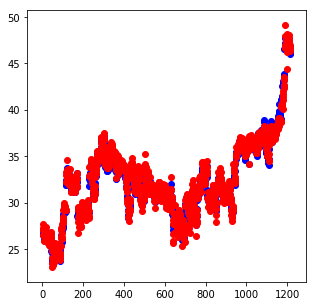

1.6598378419876099
JPM_data.csv


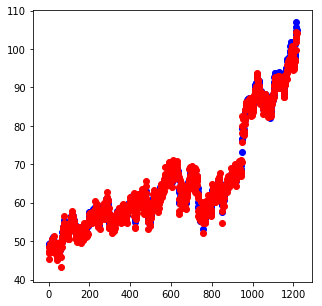

0.6121881008148193
HIG_data.csv


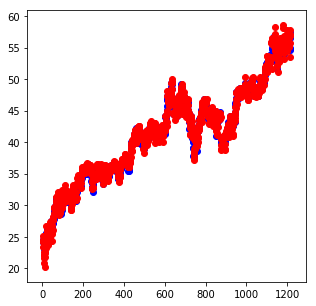

2987.273193359375
REGN_data.csv


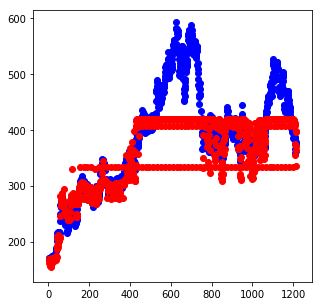

2.041412591934204
UAL_data.csv


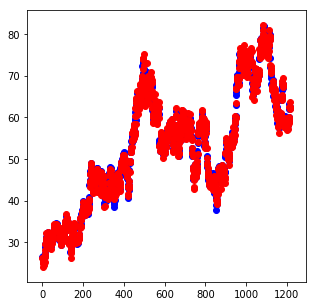

54660.87890625
AZO_data.csv


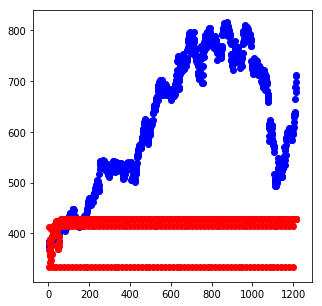

0.48699623346328735
STI_data.csv


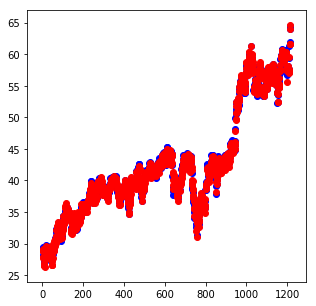

162.2031707763672
MHK_data.csv


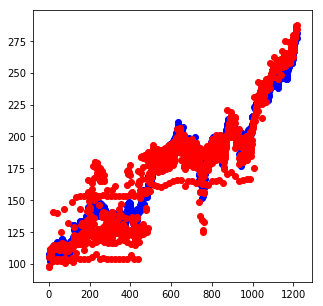

1.785808801651001
DFS_data.csv


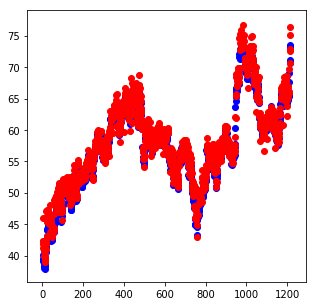

2.027076244354248
MU_data.csv


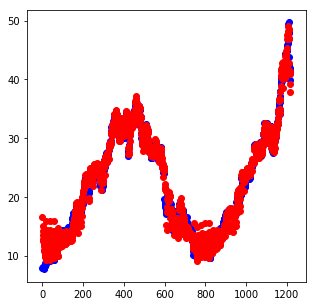

35.275901794433594
LRCX_data.csv


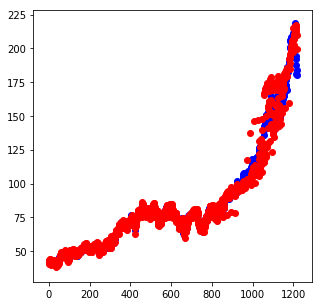

0.35381609201431274
HRB_data.csv


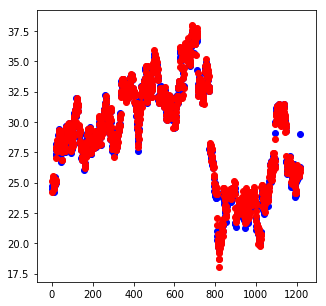

0.248508021235466
FOXA_data.csv


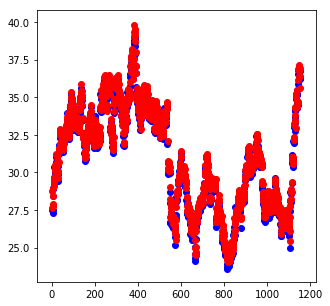

189.63661193847656
ISRG_data.csv


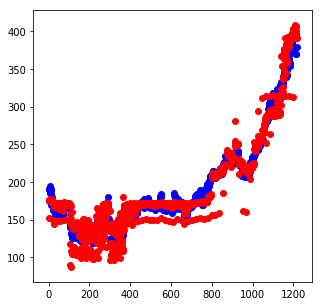

2.6647112369537354
TEL_data.csv


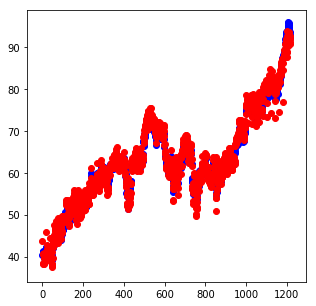

1.163413166999817
BWA_data.csv


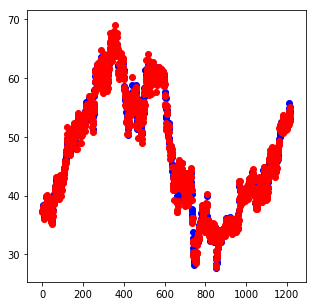

0.44753462076187134
CAG_data.csv


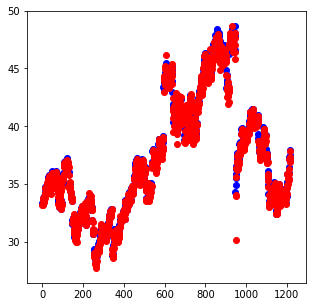

47.87681198120117
SIG_data.csv


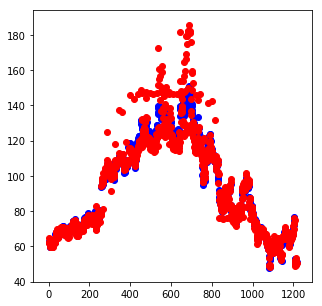

0.29776686429977417
CHD_data.csv


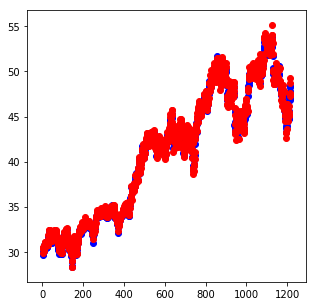

0.24277468025684357
FITB_data.csv


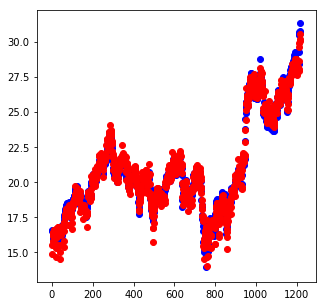

0.2749529778957367
JNPR_data.csv


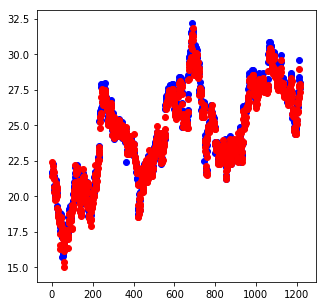

48.053741455078125
NFLX_data.csv


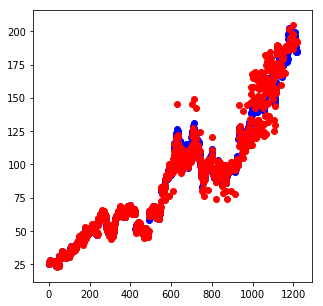

49.10931396484375
IFF_data.csv


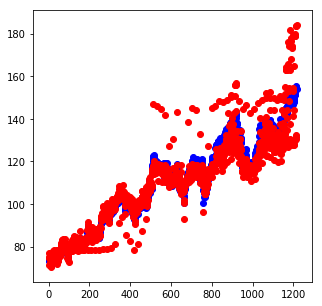

8.098876953125
EOG_data.csv


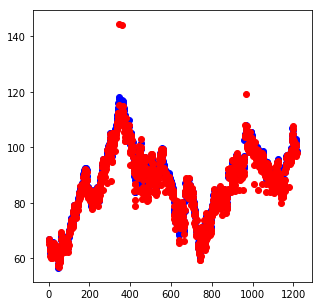

243.68214416503906
NEE_data.csv


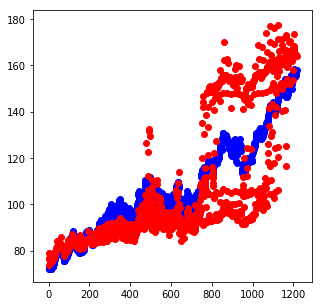

0.6078576445579529
SBUX_data.csv


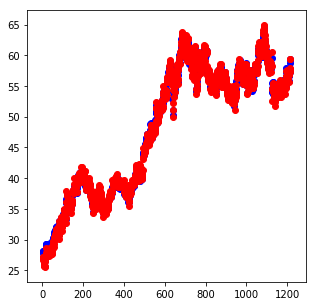

0.9703158736228943
RF_data.csv


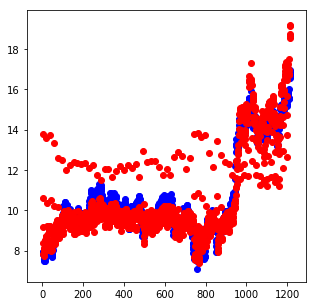

0.1302722692489624
CNP_data.csv


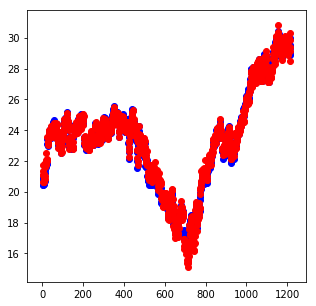

0.38742610812187195
COTY_data.csv


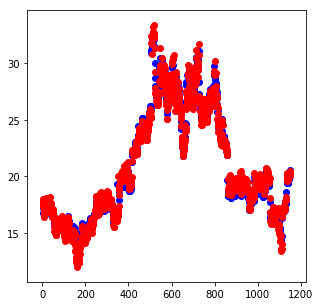

175.8500213623047
MCK_data.csv


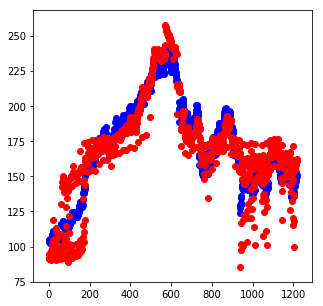

5.932114601135254
HP_data.csv


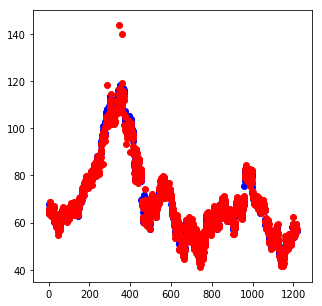

0.728964626789093
MOS_data.csv


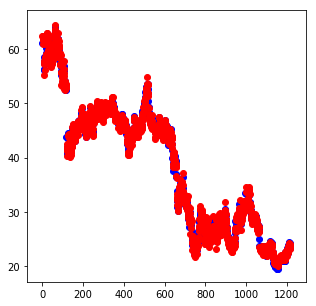

0.6242464184761047
UA_data.csv


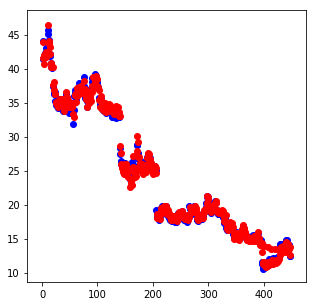

0.31593871116638184
DHI_data.csv


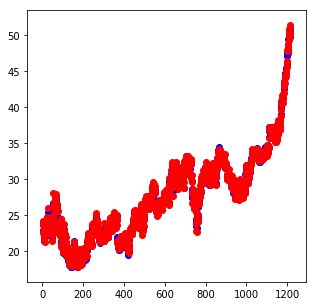

11.361801147460938
KSU_data.csv


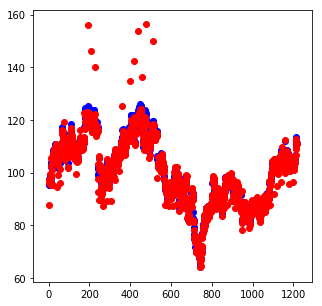

1.3169001340866089
FLR_data.csv


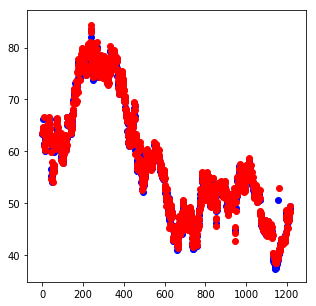

1.023615837097168
FLS_data.csv


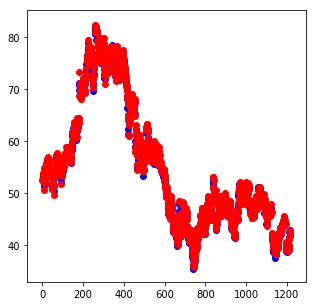

0.666473388671875
C_data.csv


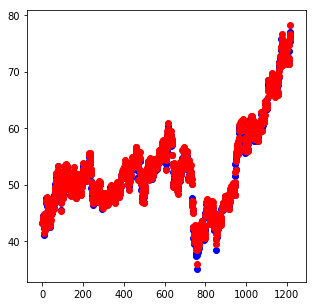

0.5337424278259277
TPR_data.csv


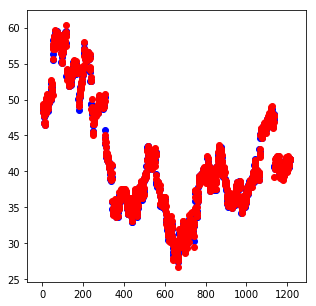

0.4018124043941498
NTAP_data.csv


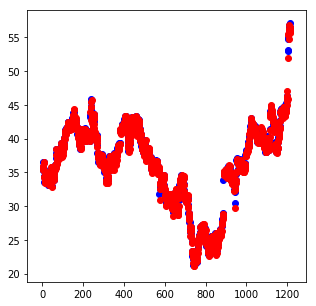

1.3461382389068604
DLTR_data.csv


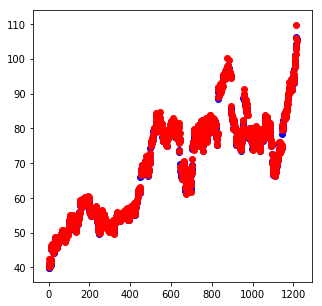

177.6382598876953
SNA_data.csv


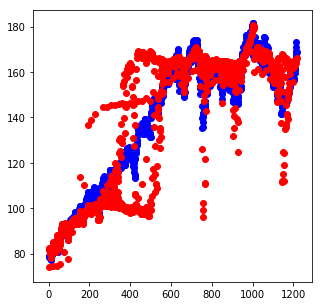

94.39482879638672
AVGO_data.csv


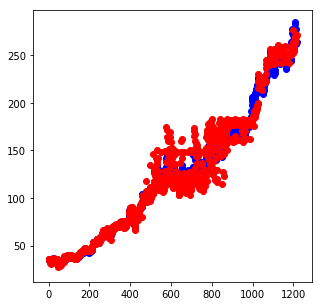

117.14945220947266
ROP_data.csv


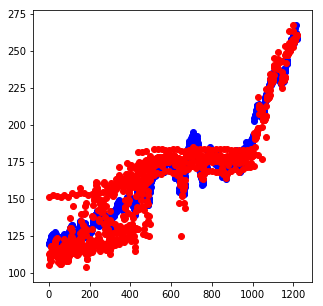

1.490591049194336
HOG_data.csv


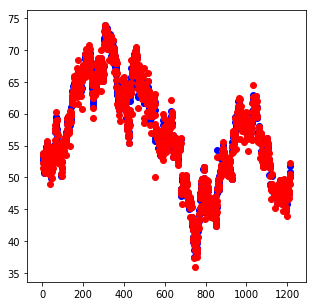

71.18228912353516
RL_data.csv


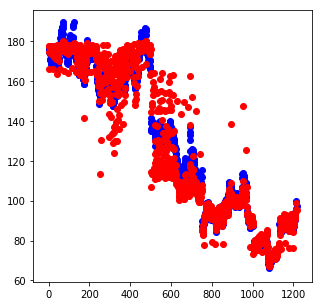

31.249671936035156
MA_data.csv


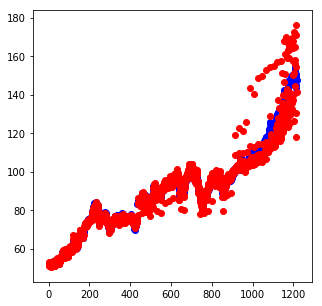

0.7962738275527954
MET_data.csv


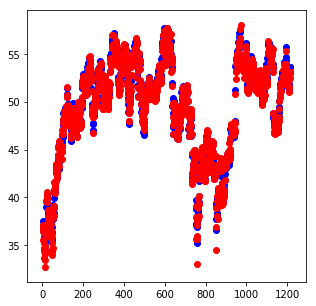

0.9252792596817017
LNC_data.csv


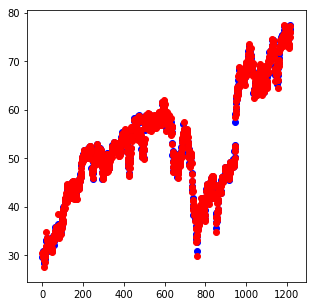

1.8172866106033325
TAP_data.csv


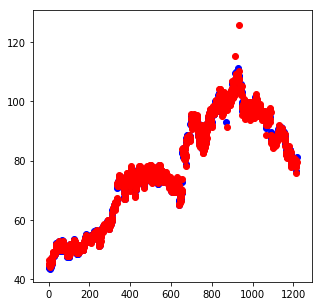

0.35255852341651917
WEC_data.csv


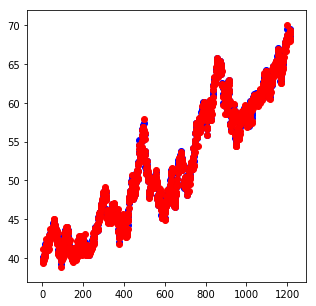

1.0501562356948853
NAVI_data.csv


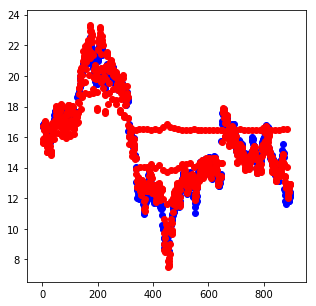

0.4341636002063751
GPS_data.csv


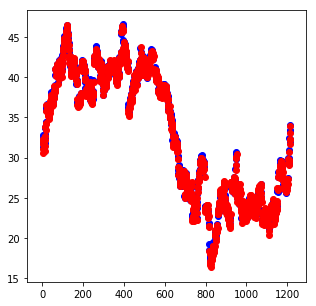

0.7208020091056824
EIX_data.csv


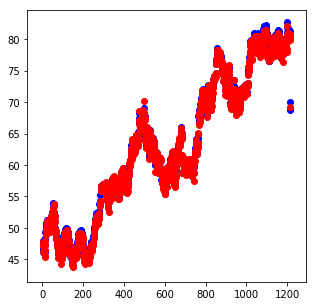

0.9435063004493713
BHF_data.csv


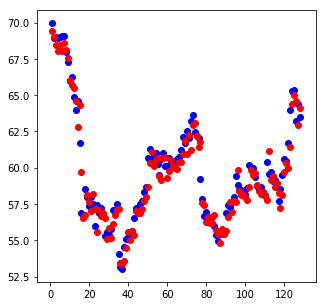

0.34174373745918274
GM_data.csv


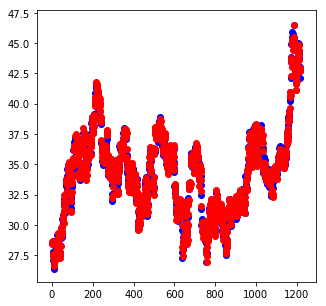

266.0581359863281
NOC_data.csv


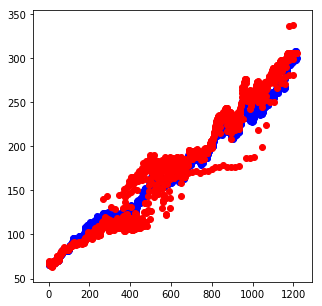

218.57090759277344
AVB_data.csv


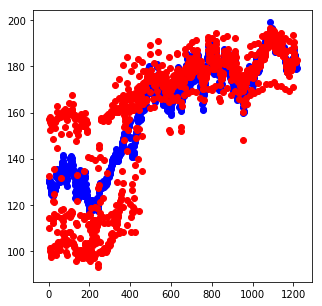

16.794755935668945
SRCL_data.csv


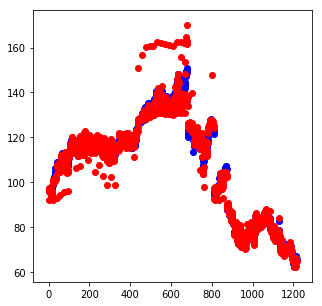

0.7009360194206238
EQR_data.csv


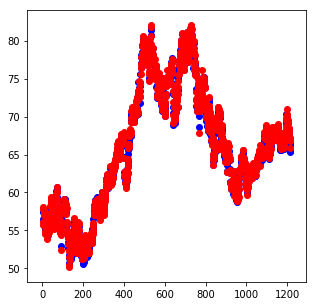

3.853055953979492
ANSS_data.csv


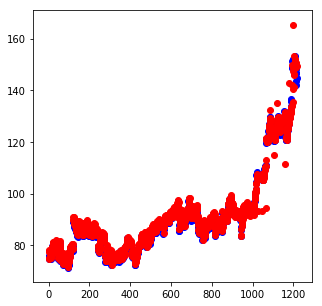

29.26259422302246
COST_data.csv


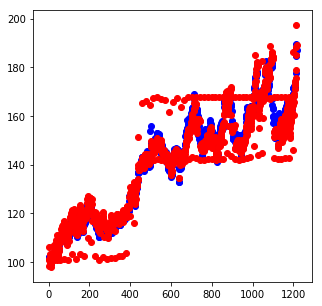

0.6737009882926941
CTL_data.csv


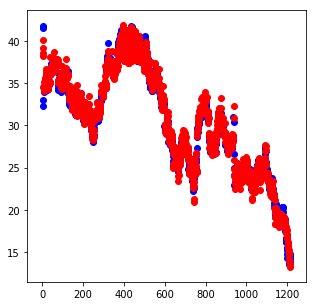

131.16717529296875
AMG_data.csv


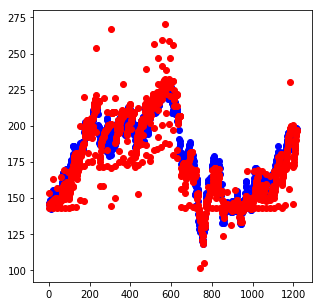

807509.3125
PCLN_data.csv


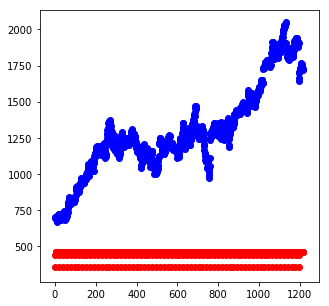

4.229602336883545
TRIP_data.csv


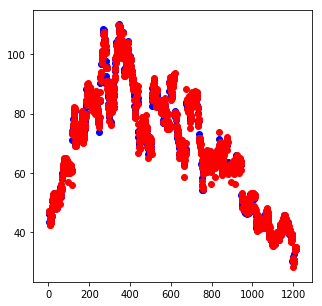

108.52760314941406
PSA_data.csv


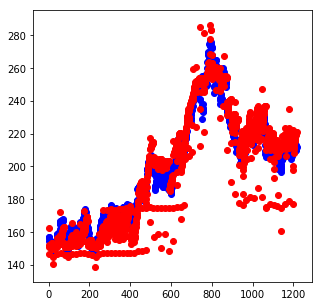

1.8362698554992676
UTX_data.csv


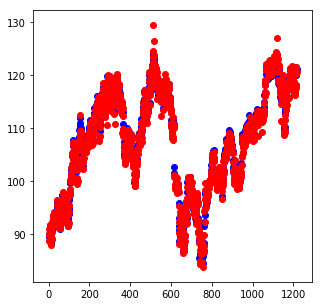

0.22576726973056793
PGR_data.csv


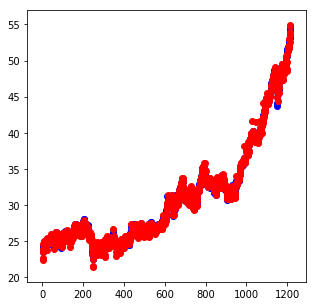

0.31423211097717285
IVZ_data.csv


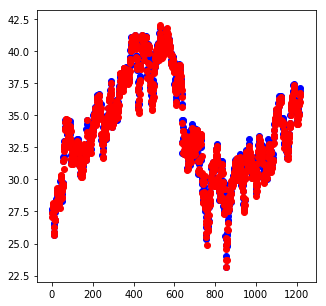

96865.1015625
GOOG_data.csv


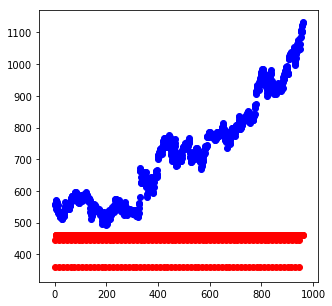

0.45581379532814026
LUK_data.csv


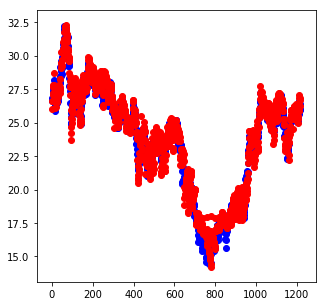

1.6369500160217285
PKG_data.csv


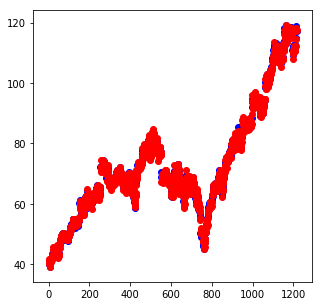

6.754652500152588
BXP_data.csv


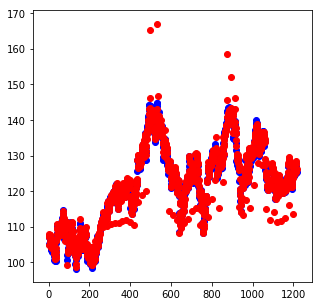

1.3520668745040894
SRE_data.csv


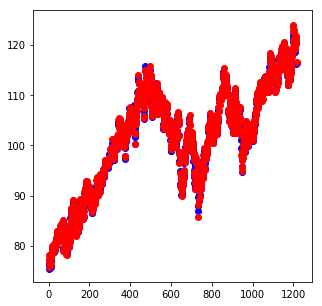

3.0653367042541504
ACN_data.csv


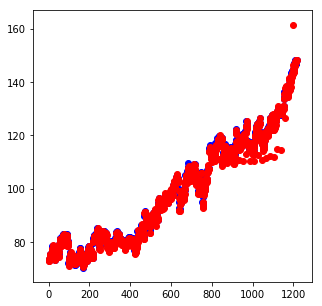

2.627936840057373
QRVO_data.csv


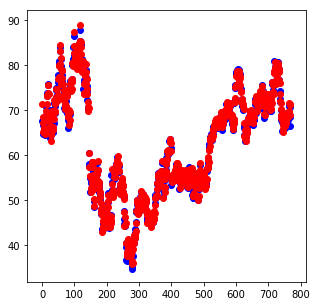

0.7550783753395081
RJF_data.csv


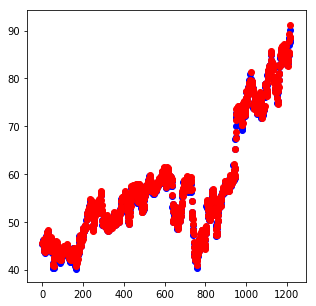

0.49384087324142456
XRAY_data.csv


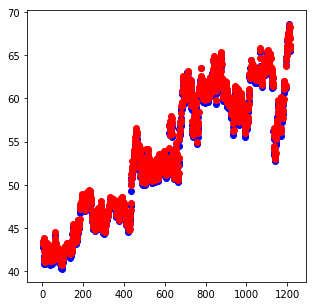

0.57244873046875
DWDP_data.csv


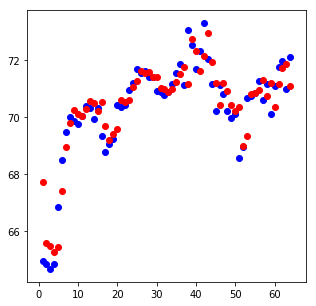

19.323959350585938
CI_data.csv


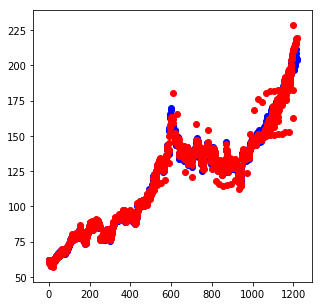

1.1541708707809448
KSS_data.csv


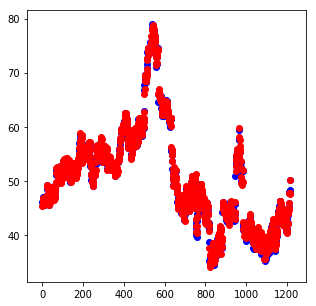

0.7082083225250244
BHGE_data.csv


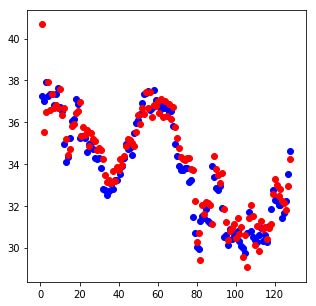

1.1604187488555908
ADI_data.csv


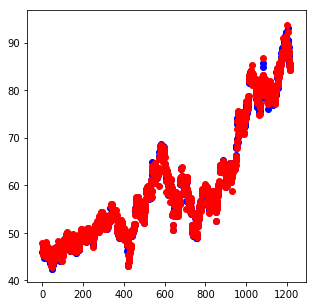

2.359877586364746
JNJ_data.csv


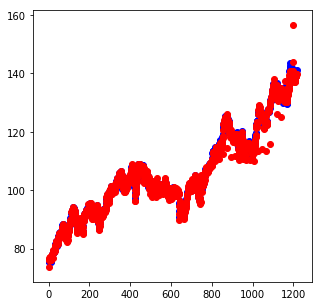

0.9480717778205872
DAL_data.csv


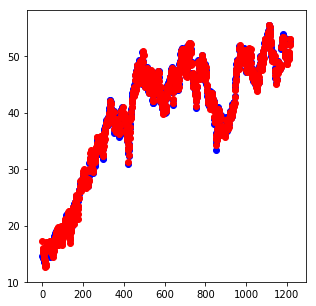

0.23380692303180695
XL_data.csv


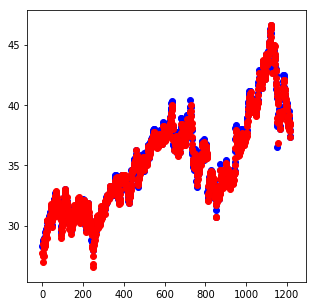

136.90487670898438
CHTR_data.csv


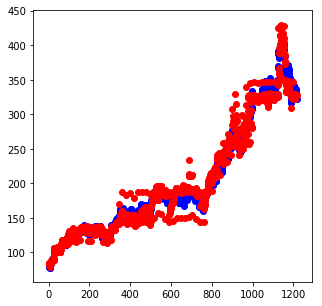

146.60267639160156
TDG_data.csv


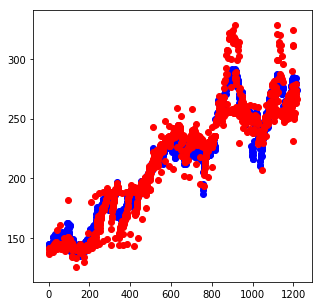

2.4744553565979004
EVHC_data.csv


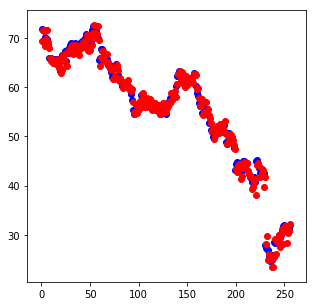

0.6444400548934937
D_data.csv


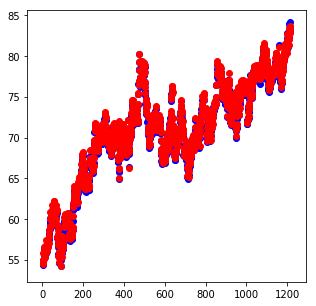

0.2976391613483429
ORCL_data.csv


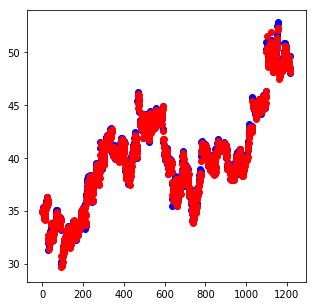

0.8881964683532715
DGX_data.csv


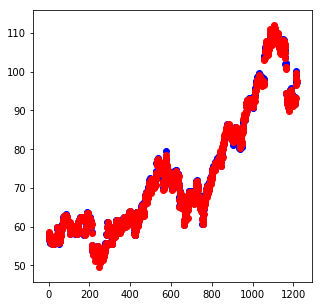

0.4680098295211792
CFG_data.csv


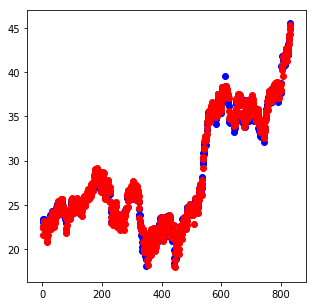

0.9548445343971252
VRSN_data.csv


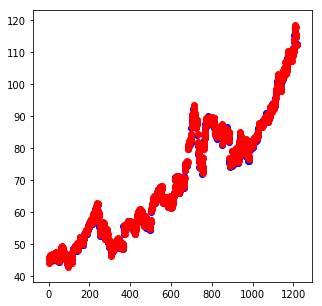

0.2360125184059143
AJG_data.csv


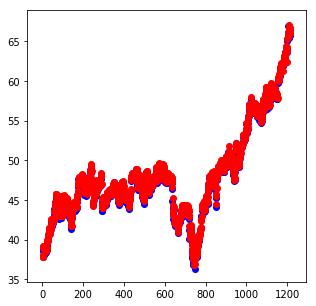

11.148975372314453
UNH_data.csv


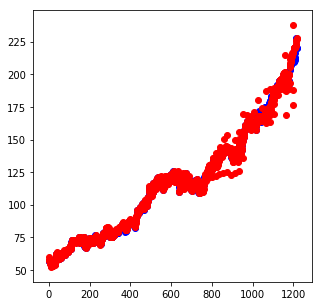

219.5584716796875
BIIB_data.csv


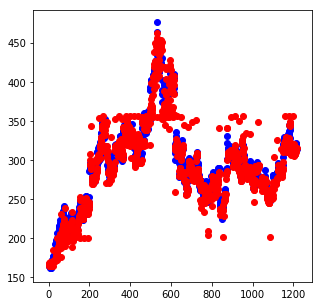

3.0171947479248047
DE_data.csv


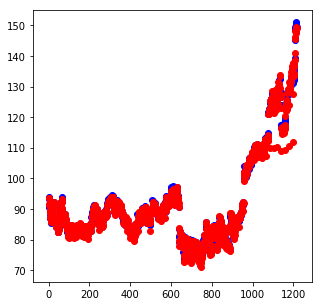

0.7217177152633667
TXN_data.csv


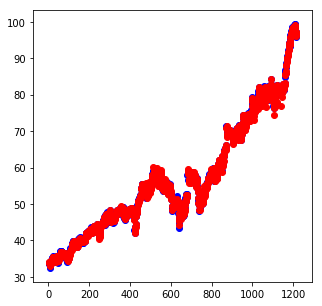

0.4436139464378357
KR_data.csv


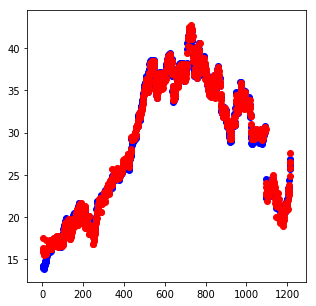

1.4296517372131348
AKAM_data.csv


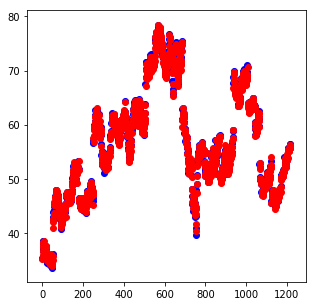

1.403050184249878
TWX_data.csv


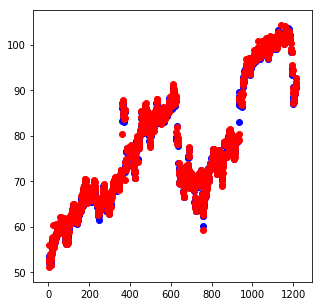

1.0778383016586304
ETN_data.csv


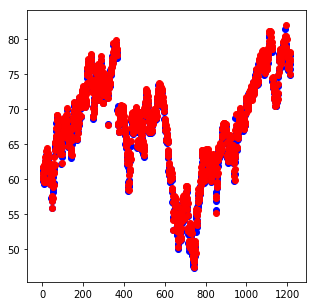

1.1506030559539795
VLO_data.csv


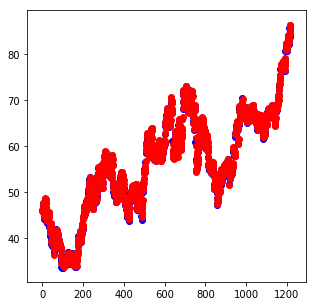

0.4189665615558624
CINF_data.csv


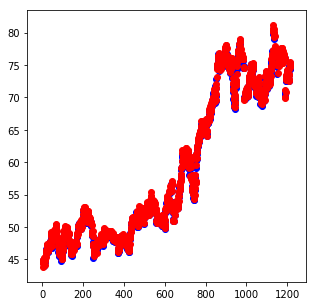

17.513877868652344
PRGO_data.csv


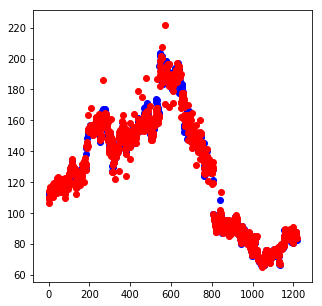

0.5084136128425598
PFG_data.csv


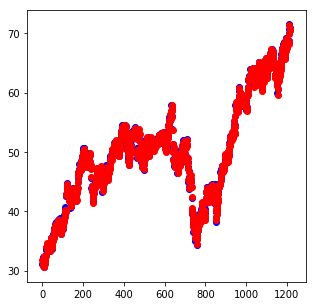

12.917850494384766
STZ_data.csv


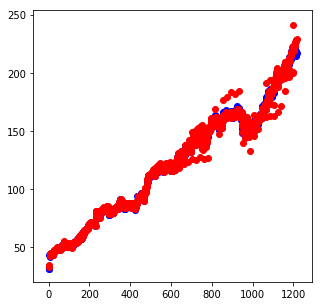

0.4945143461227417
AEP_data.csv


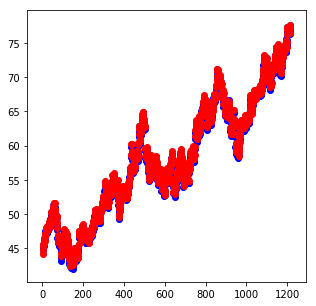

1.0177210569381714
BAC_data.csv


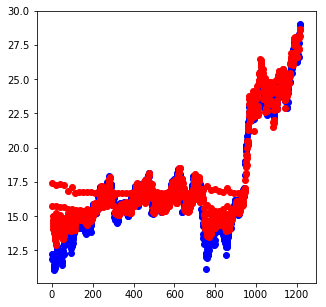

1.7257812023162842
PRU_data.csv


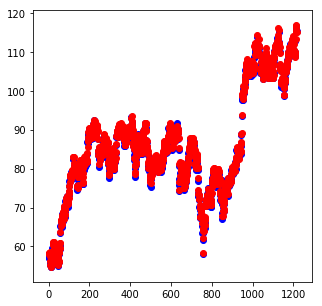

1.1100250482559204
LLY_data.csv


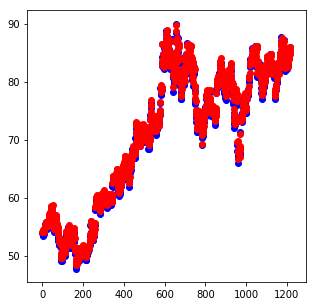

0.6327395439147949
NWSA_data.csv


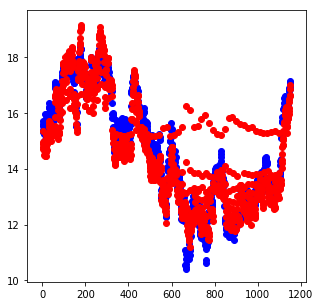

2.1941168308258057
ZBH_data.csv


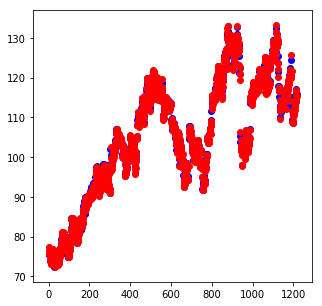

1.5716334581375122
NI_data.csv


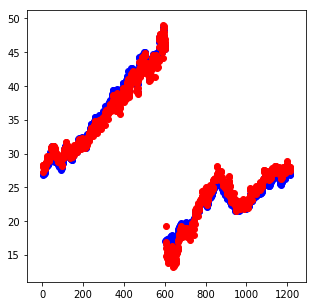

2.2101330757141113
EQT_data.csv


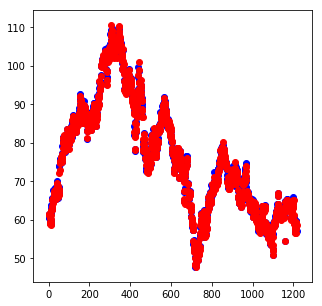

0.25485363602638245
CMCSA_data.csv


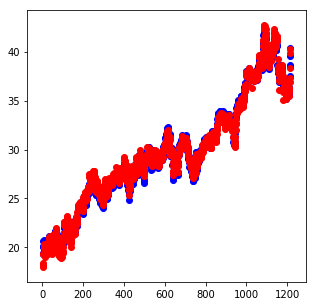

14.888986587524414
TMO_data.csv


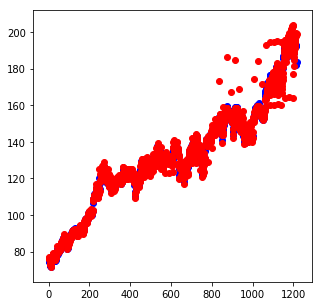

0.6433382630348206
O_data.csv


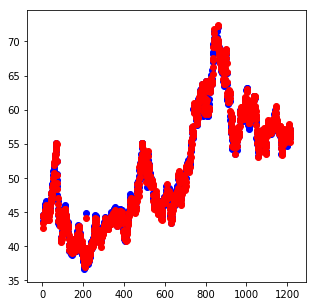

1.0128815174102783
IQV_data.csv


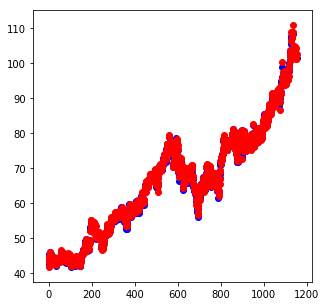

0.1814926415681839
CMS_data.csv


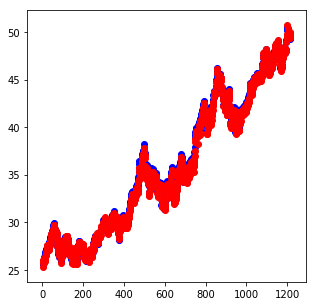

2.350918769836426
EW_data.csv


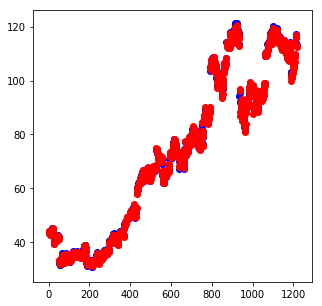

28.09847068786621
COO_data.csv


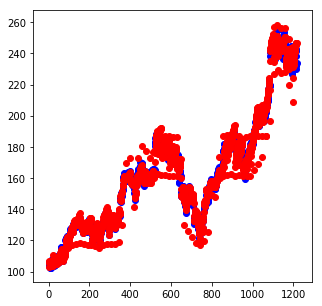

0.4545644223690033
CPB_data.csv


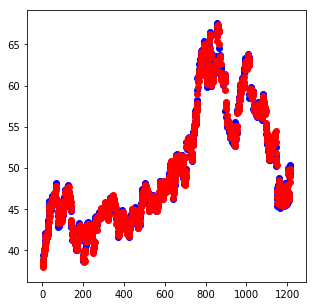

16.83045768737793
BDX_data.csv


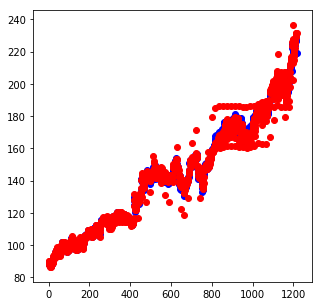

0.5882430076599121
GLW_data.csv


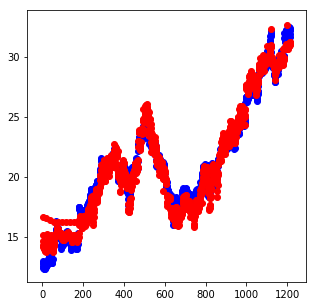

2.1547350883483887
TIF_data.csv


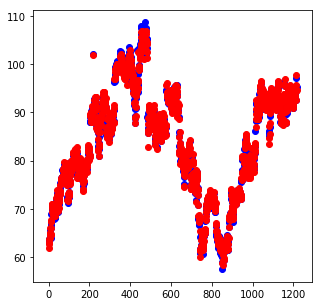

1.863994836807251
CTXS_data.csv


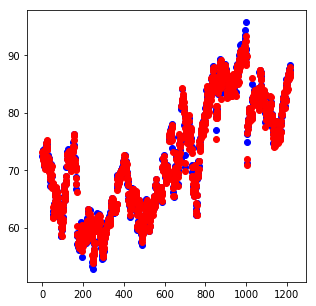

1.346101999282837
MRO_data.csv


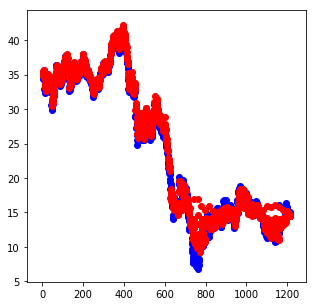

1.072885274887085
OKE_data.csv


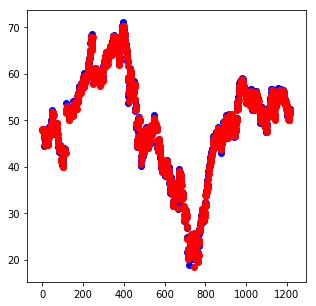

0.32730722427368164
MMC_data.csv


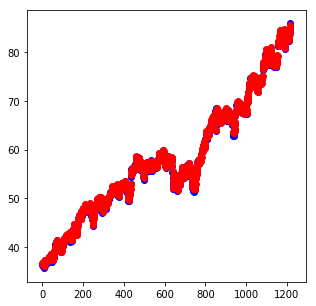

0.5601682662963867
SCG_data.csv


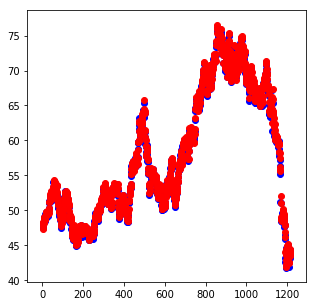

0.8771453499794006
LOW_data.csv


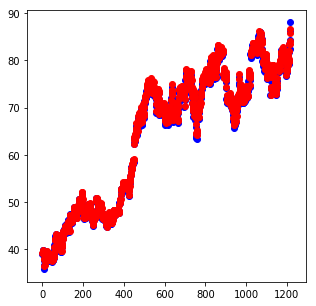

0.5627386569976807
PNW_data.csv


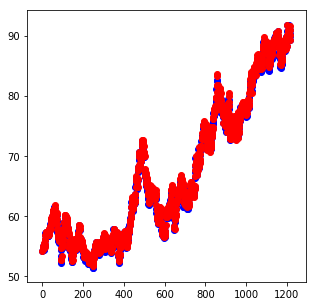

0.7293659448623657
VFC_data.csv


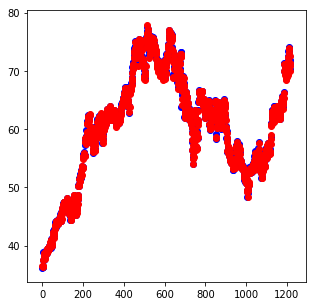

5.728964328765869
CB_data.csv


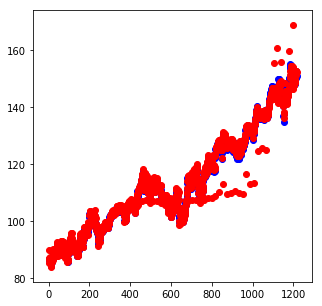

0.7560918927192688
WMT_data.csv


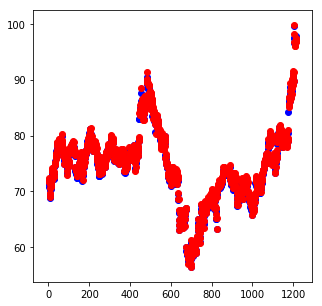

0.82152259349823
NFX_data.csv


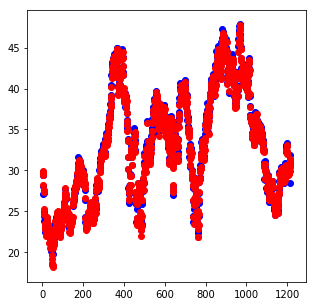

3267.348388671875
MTD_data.csv


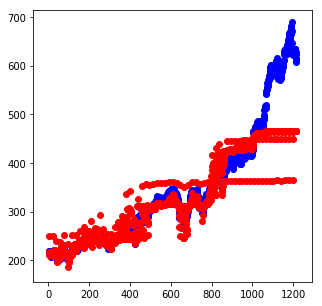

6.605600357055664
ADBE_data.csv


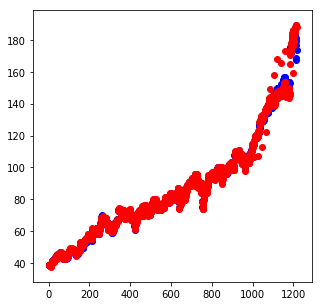

0.9713111519813538
COP_data.csv


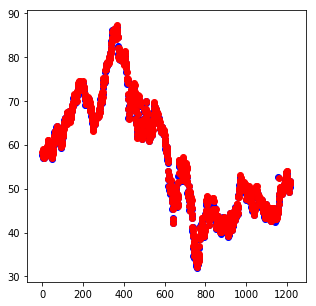

0.26662322878837585
AIV_data.csv


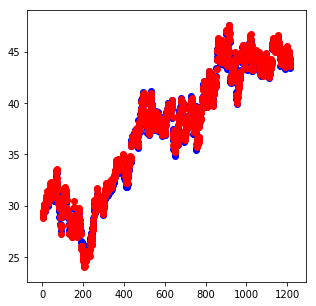

1.6249284744262695
HES_data.csv


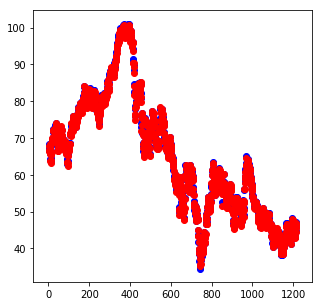

1.465159296989441
DLR_data.csv


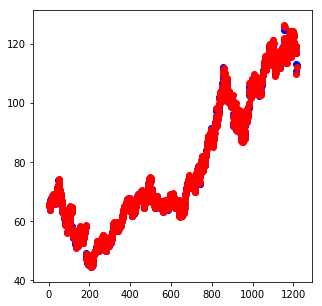

1.1229299306869507
KHC_data.csv


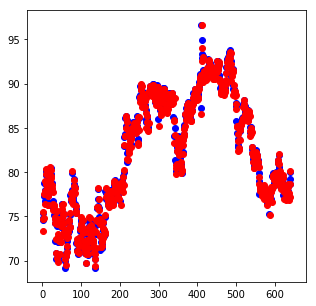

0.9208973050117493
FISV_data.csv


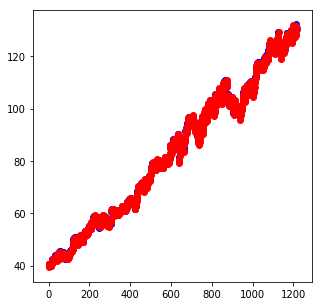

0.6501013040542603
GT_data.csv


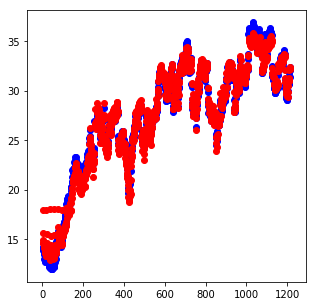

2.8851583003997803
VMC_data.csv


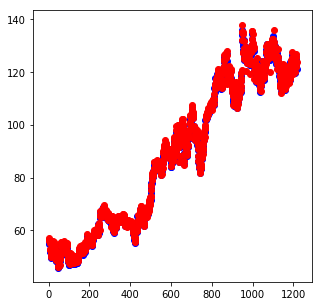

4.624971866607666
SWK_data.csv


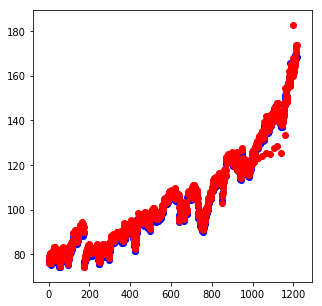

46.040889739990234
ILMN_data.csv


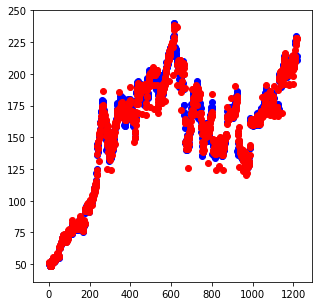

1.5792444944381714
PSX_data.csv


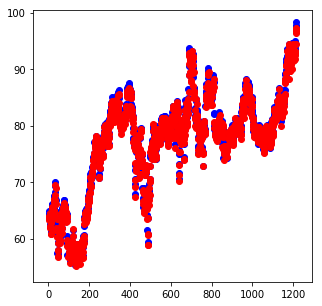

64.51712799072266
LMT_data.csv


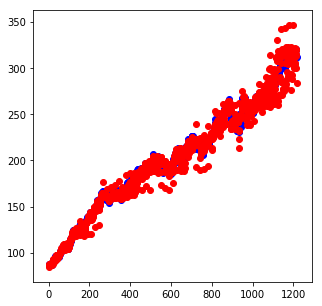

1.947240948677063
ECL_data.csv


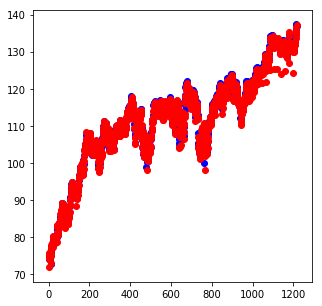

0.5083314180374146
SNPS_data.csv


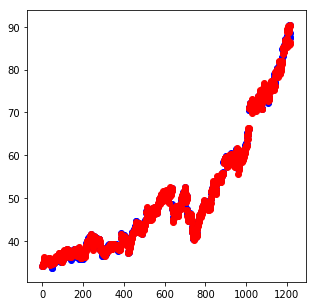

0.5955908298492432
DUK_data.csv


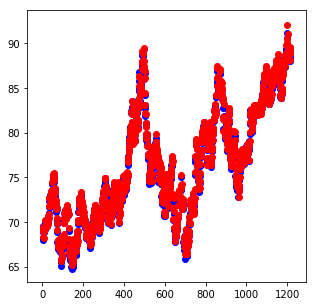

0.36250999569892883
GIS_data.csv


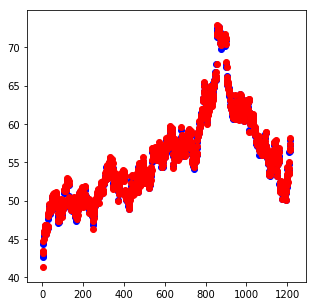

0.7630610466003418
TSN_data.csv


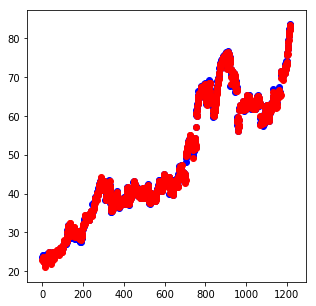

7.341183185577393
XEC_data.csv


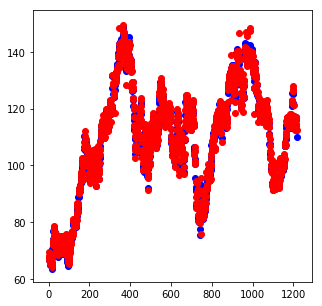

7.055627822875977
PH_data.csv


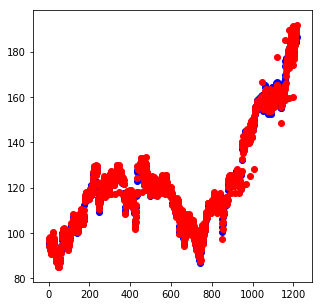

0.8114762902259827
MCHP_data.csv


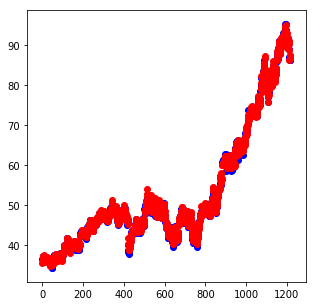

1.8962472677230835
CNC_data.csv


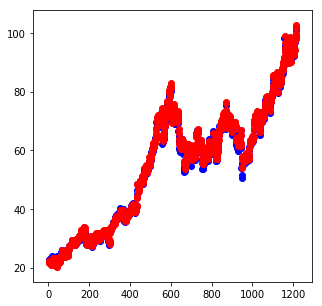

19.937368392944336
ANTM_data.csv


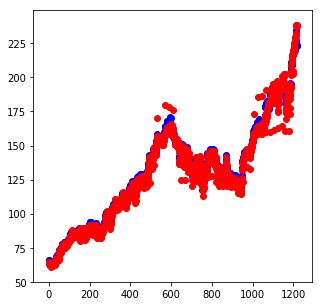

0.49231329560279846
IP_data.csv


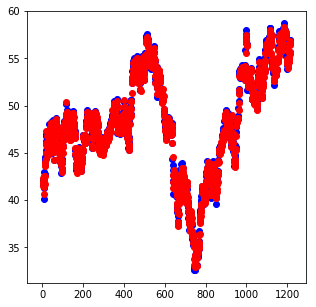

1.0371949672698975
UAA_data.csv


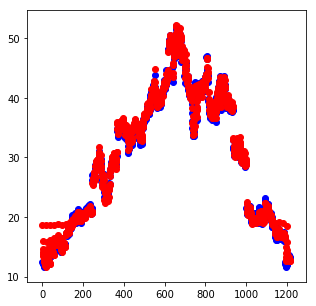

2.8255774974823
ANDV_data.csv


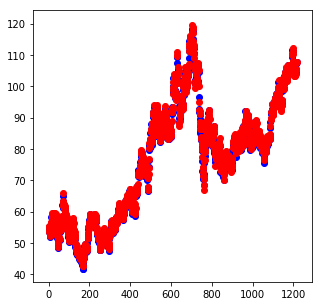

0.9506445527076721
CCI_data.csv


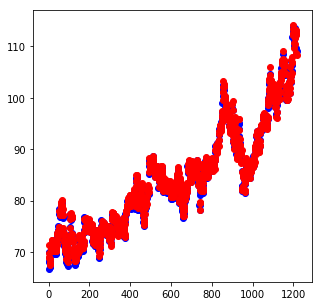

0.45833349227905273
CDNS_data.csv


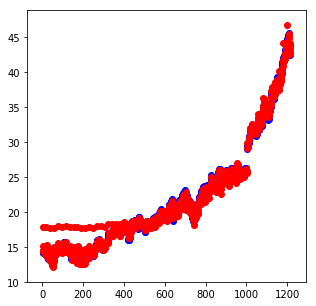

1.821755051612854
CAT_data.csv


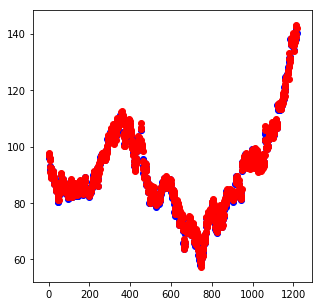

1.3369731903076172
KMX_data.csv


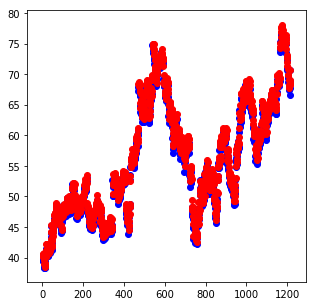

5.205755233764648
CELG_data.csv


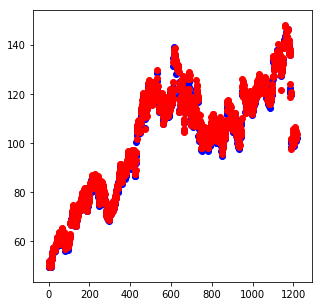

6.276028633117676
INCY_data.csv


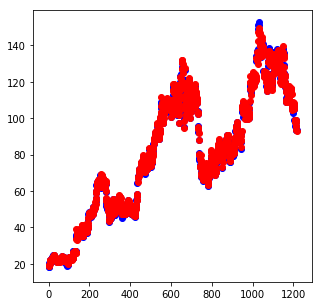

0.7049480676651001
CBOE_data.csv


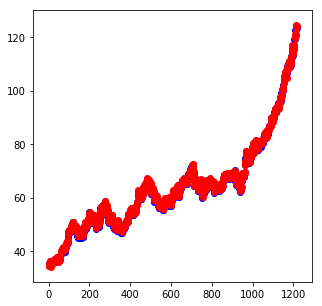

0.6253141164779663
ALL_data.csv


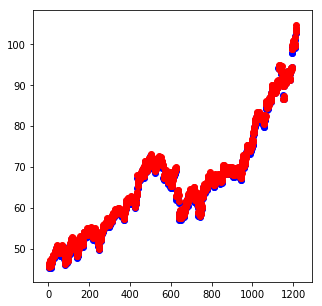

2.670238494873047
AMT_data.csv


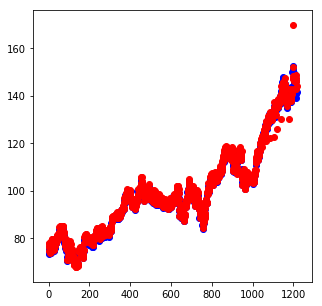

0.7394548058509827
MDT_data.csv


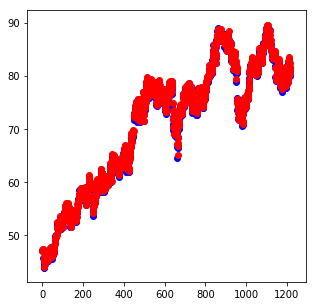

1.6023081541061401
PNC_data.csv


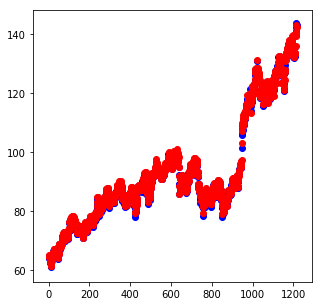

8.451045036315918
APD_data.csv


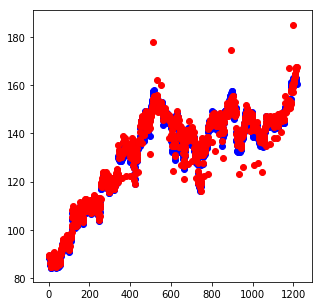

1.8469210863113403
HBAN_data.csv


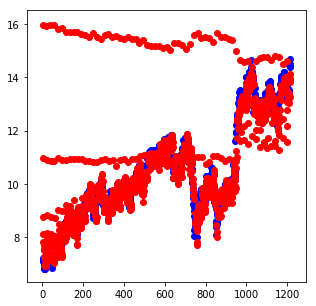

2.3999335765838623
EBAY_data.csv


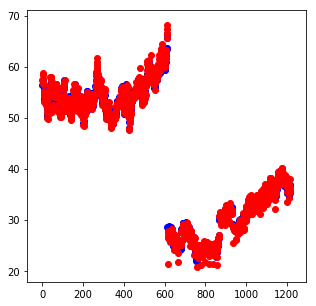

1.1470407247543335
BBY_data.csv


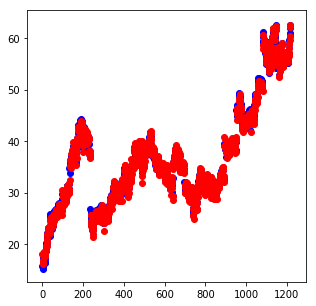

0.5100870132446289
ICE_data.csv


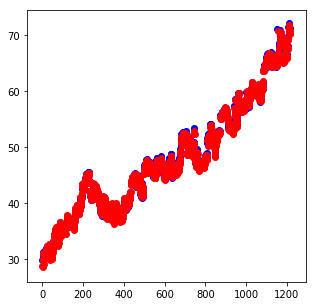

2.423245906829834
WDC_data.csv


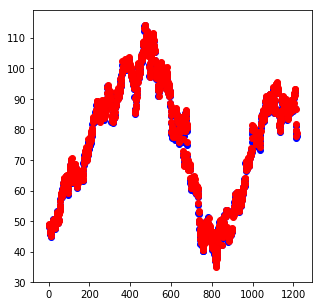

0.3307775557041168
EXC_data.csv


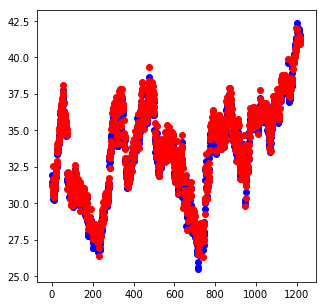

0.9227784872055054
TROW_data.csv


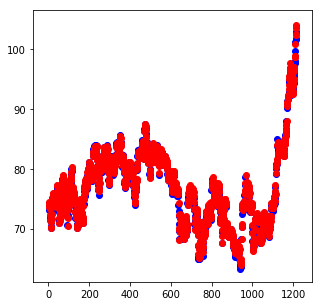

0.44908279180526733
ZTS_data.csv


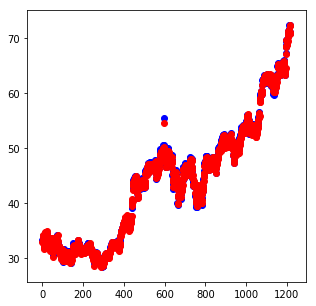

13286.220703125
CMG_data.csv


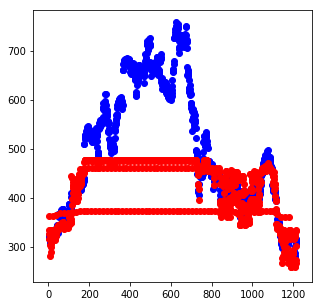

3.9051449298858643
TRV_data.csv


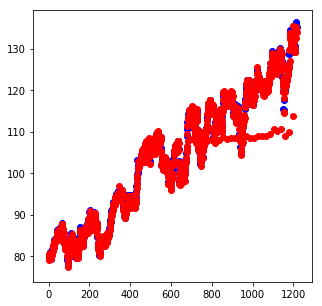

0.8828481435775757
MKC_data.csv


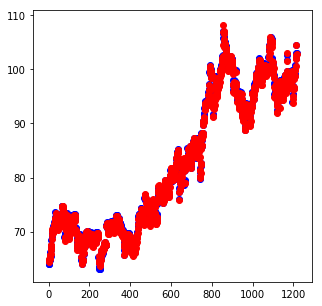

1.3856239318847656
ABC_data.csv


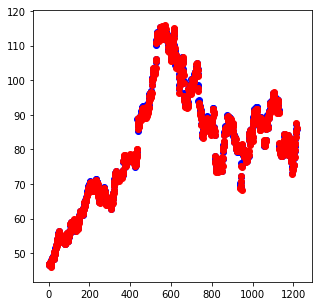

6.8198370933532715
FRT_data.csv


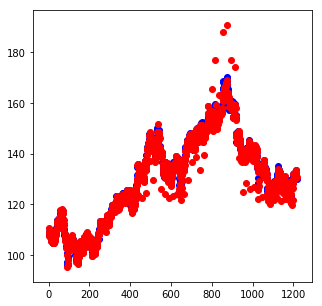

1.2625977993011475
DVN_data.csv


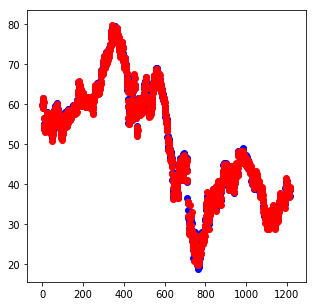

1.090153455734253
VIAB_data.csv


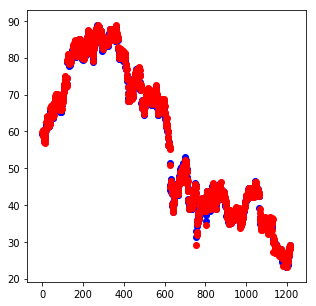

0.741864800453186
ARNC_data.csv


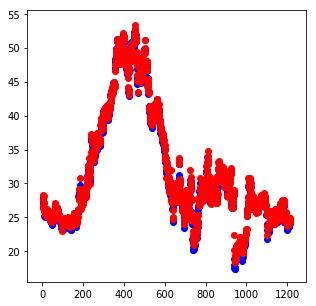

8.736625671386719
LLL_data.csv


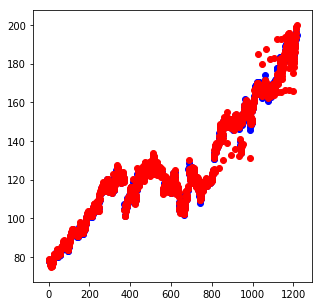

0.6102568507194519
MNST_data.csv


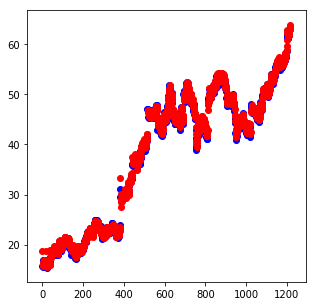

0.7535536289215088
LEN_data.csv


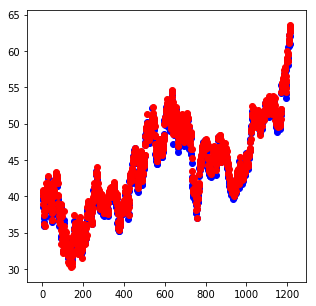

0.3542669713497162
AEE_data.csv


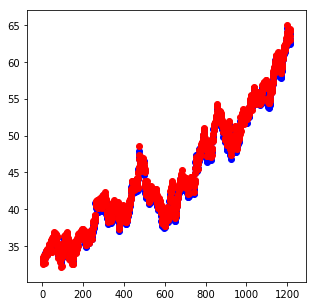

0.8565019965171814
MSI_data.csv


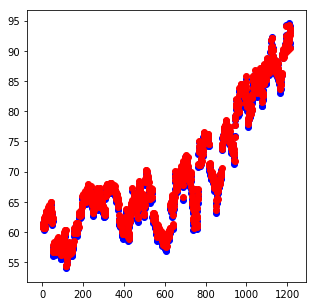

0.40934279561042786
CSX_data.csv


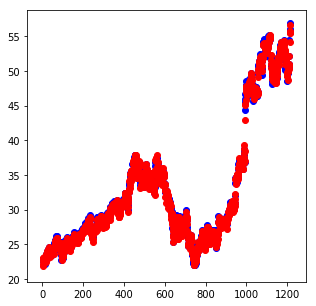

3.931969165802002
PVH_data.csv


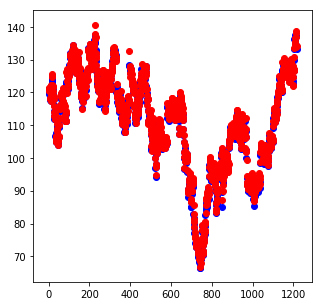

1.2294235229492188
FL_data.csv


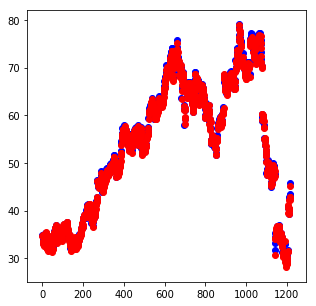

0.3541263937950134
IRM_data.csv


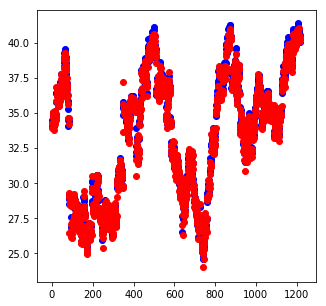

1.3508769273757935
DOV_data.csv


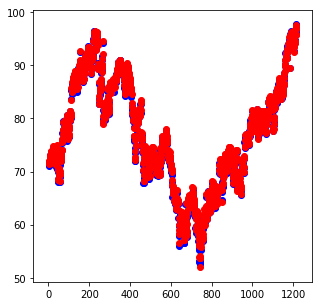

0.8850875496864319
AAL_data.csv


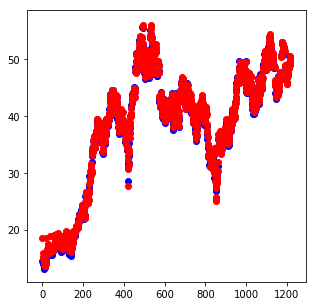

68.77932739257812
SPG_data.csv


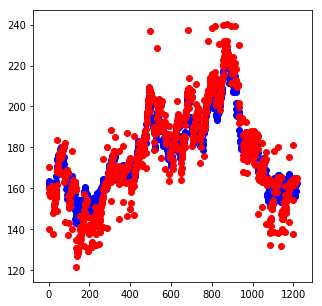

0.4073920249938965
MS_data.csv


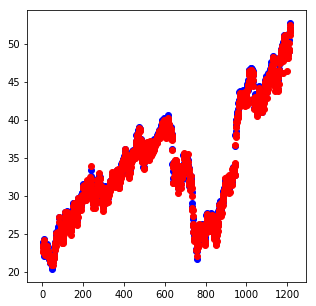

0.18227367103099823
CSCO_data.csv


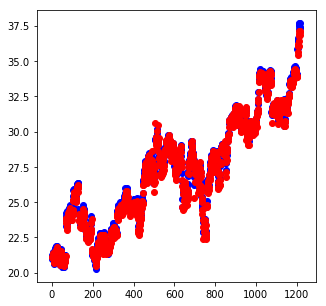

12.464973449707031
NVDA_data.csv


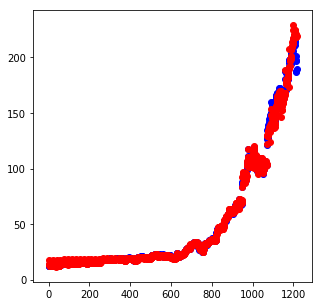

1.5392521619796753
RRC_data.csv


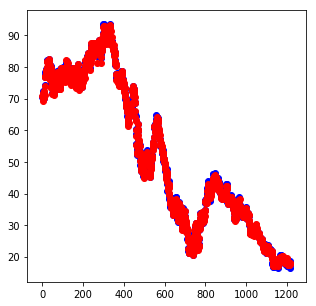

0.6039829850196838
PKI_data.csv


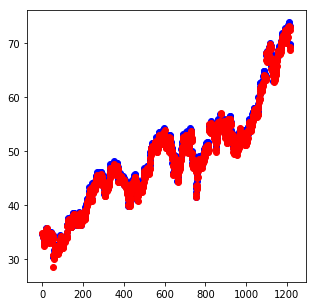

3.7174837589263916
NSC_data.csv


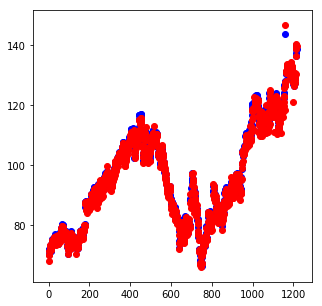

0.4768747091293335
BEN_data.csv


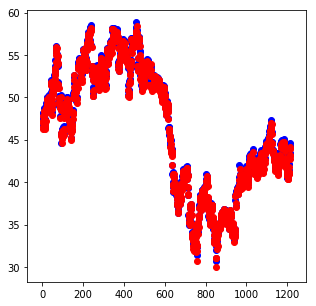

4.308814525604248
SBAC_data.csv


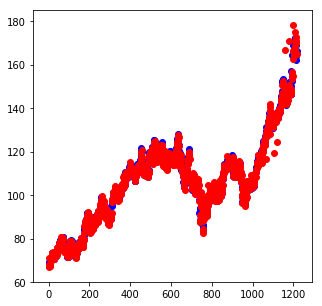

0.2632257342338562
UNM_data.csv


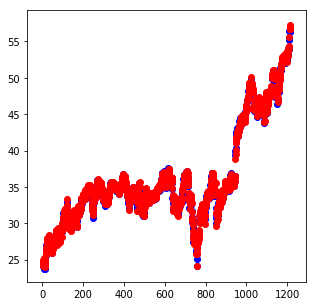

0.7895246148109436
VRSK_data.csv


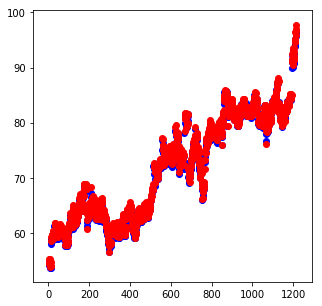

0.6084504127502441
NEM_data.csv


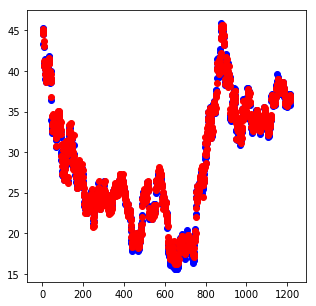

1.592138409614563
KLAC_data.csv


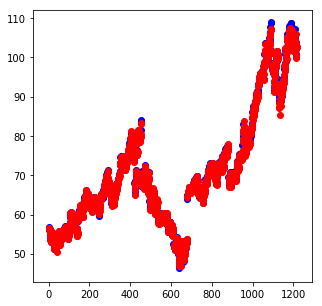

0.20283591747283936
BLL_data.csv


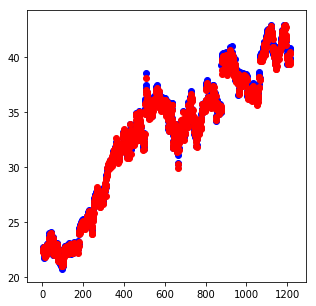

0.5453285574913025
EMR_data.csv


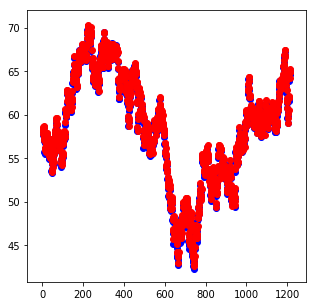

2.0067214965820312
KMB_data.csv


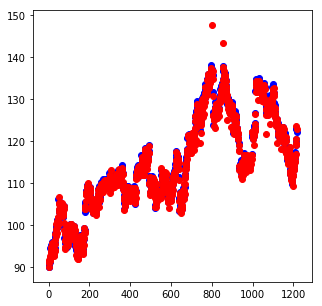

1.654066801071167
DIS_data.csv


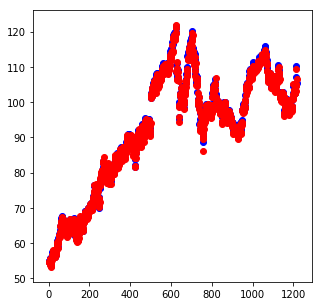

0.15260840952396393
PPL_data.csv


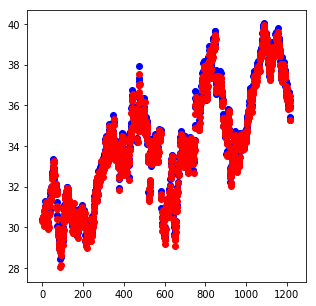

5.303920745849609
AET_data.csv


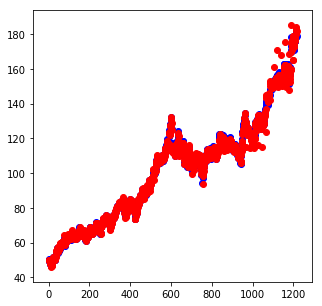

0.3473851978778839
ES_data.csv


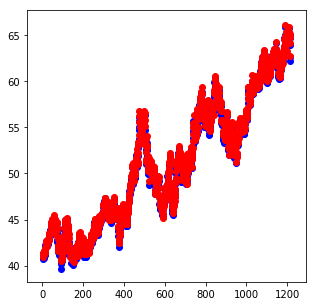

1.1829875707626343
UPS_data.csv


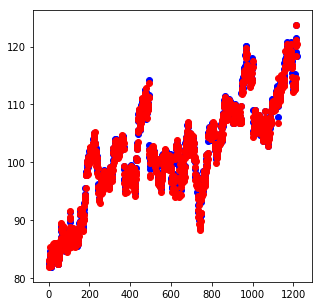

0.9039290547370911
EXR_data.csv


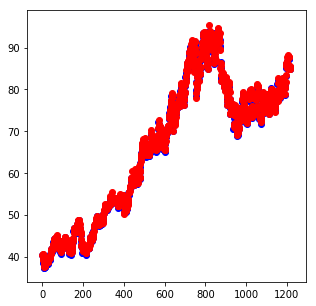

91.33917236328125
ULTA_data.csv


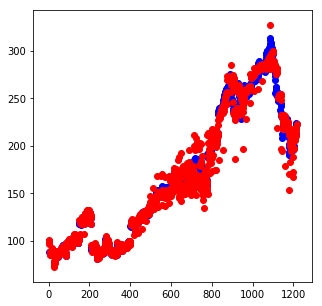

142.6715545654297
GWW_data.csv


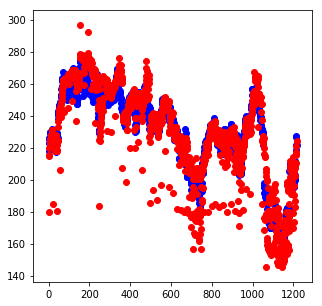

0.3706898093223572
TMK_data.csv


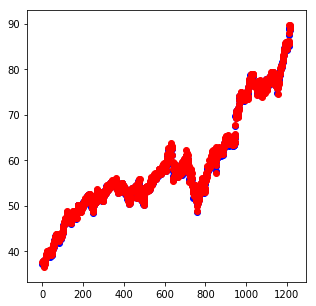

0.6008160710334778
K_data.csv


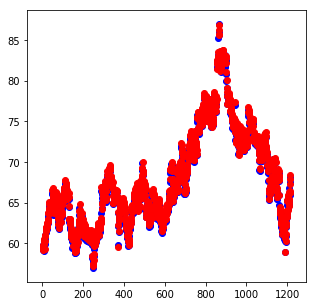

1.1048027276992798
SNI_data.csv


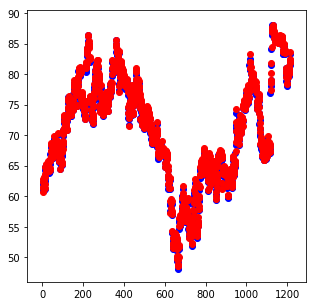

0.6496492624282837
GRMN_data.csv


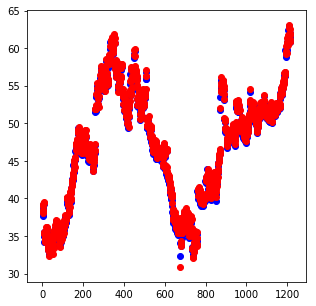

1.2344945669174194
CVS_data.csv


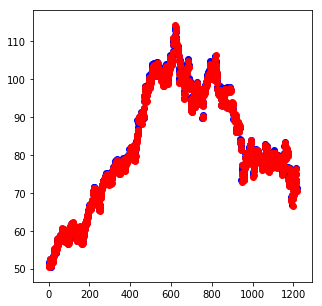

0.8941455483436584
CF_data.csv


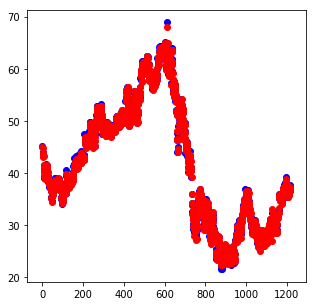

7.691917419433594
AMD_data.csv


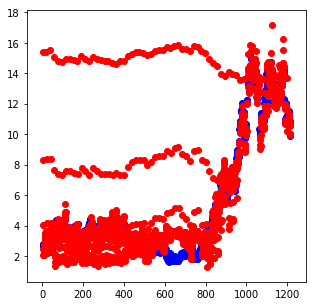

1.1356886625289917
PNR_data.csv


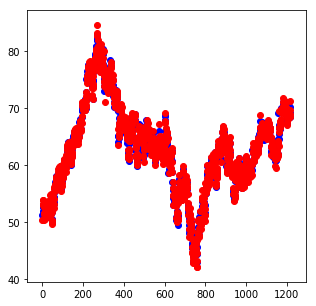

2.1156423091888428
RHT_data.csv


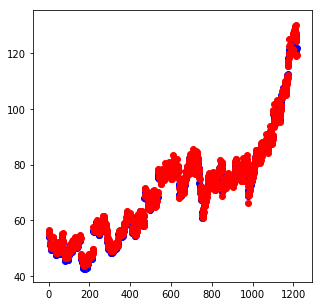

0.41832780838012695
AME_data.csv


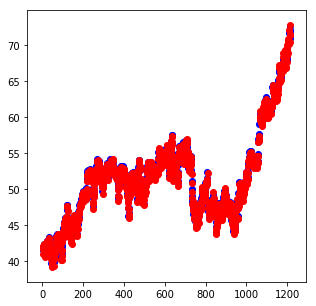

RuntimeError: expected a non-empty list of Tensors

In [152]:
for filename in os.listdir('/Users/js/Desktop/datasets/sp500/individual_stocks_5yr/'):
    vals = []
    if filename.endswith(".csv"): 
        with open(f'/Users/js/Desktop/datasets/sp500/individual_stocks_5yr/{filename}', 'r') as f:
            reader = csv.reader(f)
            next(reader)
            for row in reader:
                vals.append(row[4])
                
    vals = [float(j) for j in vals]
    vals = torch.tensor(vals)

    x = vals[:-1].unsqueeze(1)
    y = vals[1:].unsqueeze(1)
    
    batch_size = 64
    chunks = len(x) // 64

    times = torch.arange(1, chunks * batch_size + 1)

    x = x[:chunks * batch_size]
    x = x.reshape(batch_size, -1, 1)

    y = y[:chunks * batch_size]
    y = y.reshape(batch_size, -1, 1)

    epochs = 300
    show_every = 300

    for e in range(epochs):
        model.zero_grad()
        prediction, hidden = model(x, hidden)
        loss = loss_fn(prediction, y)
        loss.backward()
        optimizer.step()
        if (e+1) % show_every == 0:
            print(loss.item())
            print(filename)
            plt.figure(figsize=(5, 5))
            prediction = prediction.reshape(-1, 1)
            prediction = prediction.detach().numpy()
            plt.scatter(times, y.reshape(-1, 1), color='b')
            plt.scatter(times, prediction, color='r')
            plt.show()

In [215]:
f = open('/Users/js/Desktop/hidden.py', 'w' )
f.write(hidden)
f.close()

TypeError: write() argument must be str, not tuple

In [216]:
f = open('/Users/js/programs/hidden.pckl', 'wb')
pickle.dump(hidden, f)
f.close()

torch.save(model, '/Users/js/programs/lstm-stock-time-series.pt')

/usr/local/lib/python3.7/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type lstm. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
